# Proyecto Tutorial K-Means

In [1]:
# Your code here
import pandas as pd
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn import metrics


### Paso 1: Carga del conjunto de datos

In [2]:
# URL del archivo CSV
url = 'https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv'

# Leer el archivo CSV desde la URL
data_housing = pd.read_csv(url)

# Ruta de destino
ruta_destino = '/workspaces/Proyecto-K-Medias/data/housing.csv'

# Crear el directorio si no existe
os.makedirs(os.path.dirname(ruta_destino), exist_ok=True)

# Guardar el DataFrame en la ruta especificada con una copia de la data original
data_housing.to_csv(ruta_destino, index=False)

print(f'Archivo guardado en: {ruta_destino}')

Archivo guardado en: /workspaces/Proyecto-K-Medias/data/housing.csv


In [3]:
data_housing.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

In [4]:
# Seleccionamos las variables a utilizar

data_kmeans = data_housing[["MedInc", "Latitude", "Longitude"]]
data_kmeans.head()

MedInc  Latitude  Longitude
0  8.3252     37.88    -122.23
1  8.3014     37.86    -122.22
2  7.2574     37.85    -122.24
3  5.6431     37.85    -122.25
4  3.8462     37.85    -122.25

In [5]:
data_kmeans.describe()

MedInc      Latitude     Longitude
count  20640.000000  20640.000000  20640.000000
mean       3.870671     35.631861   -119.569704
std        1.899822      2.135952      2.003532
min        0.499900     32.540000   -124.350000
25%        2.563400     33.930000   -121.800000
50%        3.534800     34.260000   -118.490000
75%        4.743250     37.710000   -118.010000
max       15.000100     41.950000   -114.310000

Dividimos conjunto de datos de Train y Test

In [6]:
X_train, X_test= train_test_split(data_kmeans, test_size = 0.2, random_state = 42, shuffle=True)
X_train.head()

MedInc  Latitude  Longitude
14196  3.2596     32.71    -117.03
8267   3.8125     33.77    -118.16
17445  4.1563     34.66    -120.48
14265  1.9425     32.69    -117.11
2271   3.5542     36.78    -119.80

### Paso 2: Construye un K-Means

In [7]:
# Crear modelo k-Means con 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42)

kmeans.fit(X_train)

cluster_tr=kmeans.fit_predict(X_train)

# Guardamos clusters asignados a cada registros de train
labels_train=kmeans.labels_

# Numero clusters usados para X_train
n_clusters_train=kmeans.n_clusters

# Valor de los centroides calculados para cada clusters y variable de X_train
centroides_train=kmeans.cluster_centers_

# Asignacion clusters calculados X_train en una nueva columna
X_train['cluster']=cluster_tr

In [8]:
print(cluster_tr[:9])
print(labels_train[:9])
print(len(kmeans.labels_))

[3 1 1 3 5 0 3 0 3]
[3 1 1 3 5 0 3 0 3]
16512


In [9]:
X_train.head(9)

MedInc  Latitude  Longitude  cluster
14196  3.2596     32.71    -117.03        3
8267   3.8125     33.77    -118.16        1
17445  4.1563     34.66    -120.48        1
14265  1.9425     32.69    -117.11        3
2271   3.5542     36.78    -119.80        5
17848  6.6227     37.42    -121.86        0
6252   2.5192     34.04    -117.97        3
9389   7.9892     37.91    -122.53        0
6113   1.5000     34.13    -117.90        3

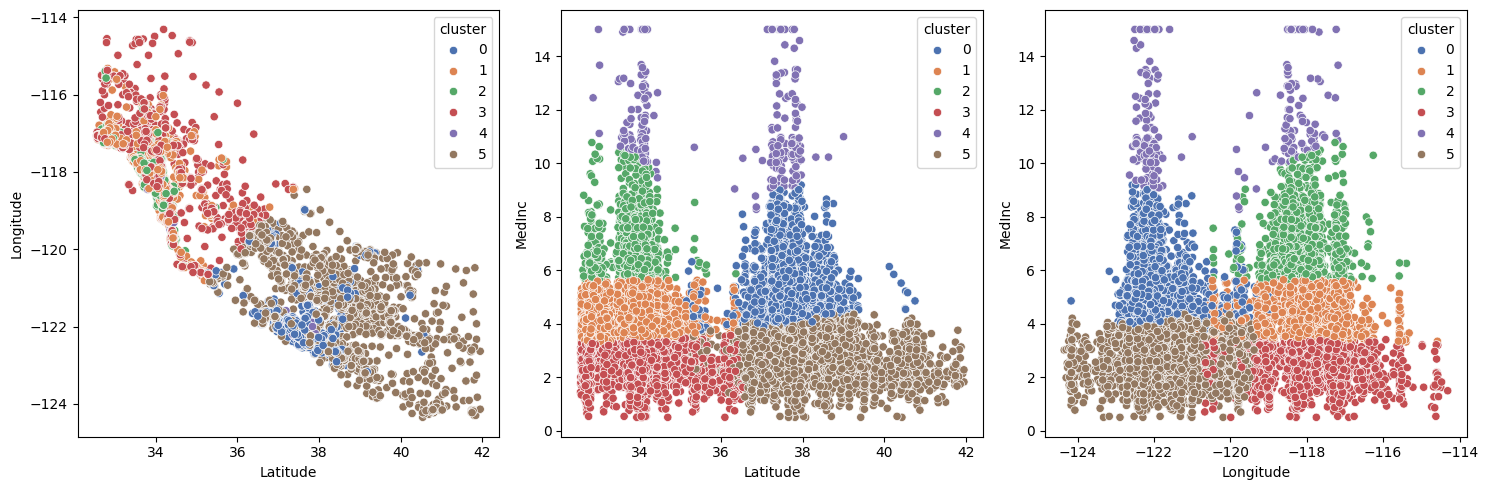

In [10]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep")
plt.tight_layout()

plt.show()

### Paso 3: Predice con el conjunto de test

In [11]:
y_test = list(kmeans.predict(X_test))
X_test["cluster"] = y_test
X_test.head()

MedInc  Latitude  Longitude  cluster
20046  1.6812     36.06    -119.01        3
3024   2.5313     35.14    -119.46        3
15663  3.4801     37.80    -122.44        5
20484  5.7376     34.28    -118.72        2
9814   3.7250     36.62    -121.93        5

### Graficamos para comparar los datos de entrenamiento

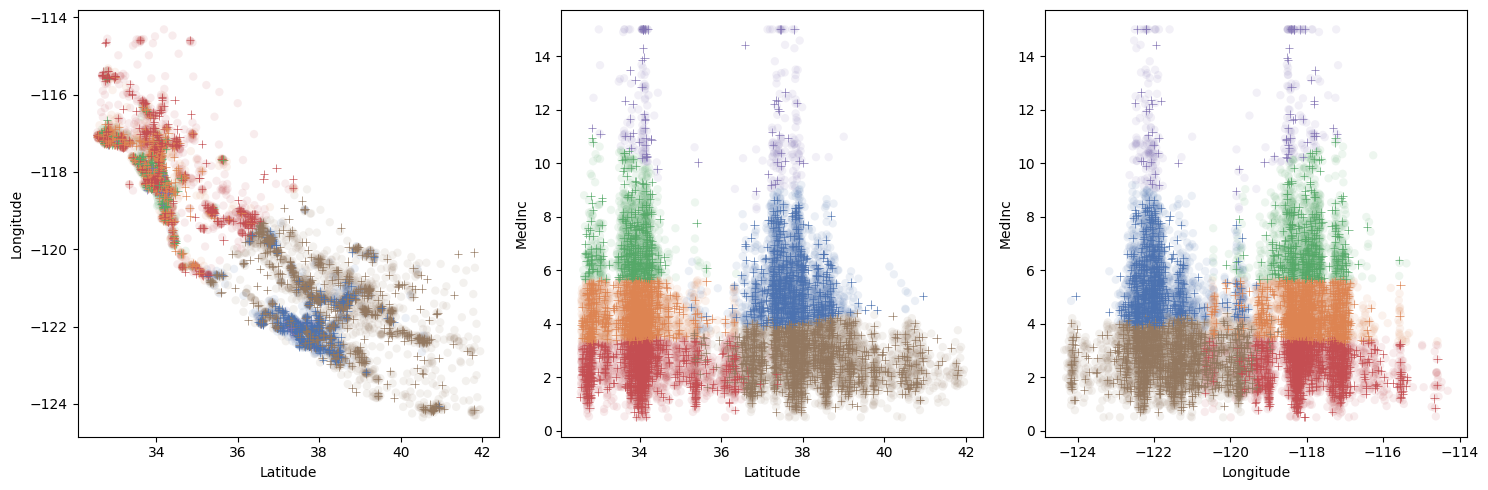

In [12]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)

sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")

plt.tight_layout()

for ax in axis:
    ax.legend([],[], frameon=False)

plt.show()

### Los graficos nos permiten evidenciar que hay una buena exactitud al predecir a qué clúster pertenece cada punto de prueba.

### Paso 4: Entrena un modelo de clasificación supervisada

Utilizando RandomForestClassifier

In [13]:
# 
y_train=X_train['cluster']
X_train.drop('cluster',axis=1,inplace=True)
y_test=X_test['cluster']
X_test.drop('cluster',axis=1,inplace=True)
X_train.head()

MedInc  Latitude  Longitude
14196  3.2596     32.71    -117.03
8267   3.8125     33.77    -118.16
17445  4.1563     34.66    -120.48
14265  1.9425     32.69    -117.11
2271   3.5542     36.78    -119.80

In [14]:
model_rf = RandomForestClassifier(random_state = 42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Predecir las clases
y_pred = model_rf.predict(X_test)

# Crear un DataFrame para las predicciones
results = pd.DataFrame(X_test)
results['cluster'] = y_pred

# Graficar
fig = px.scatter_3d(
    results, 
    x='Longitude', 
    y='Latitude', 
    z='MedInc', 
    color='cluster', 
    title='Visualización 3D de Clusters Predichos',
    color_continuous_scale=px.colors.sequential.Viridis
)
fig.show()

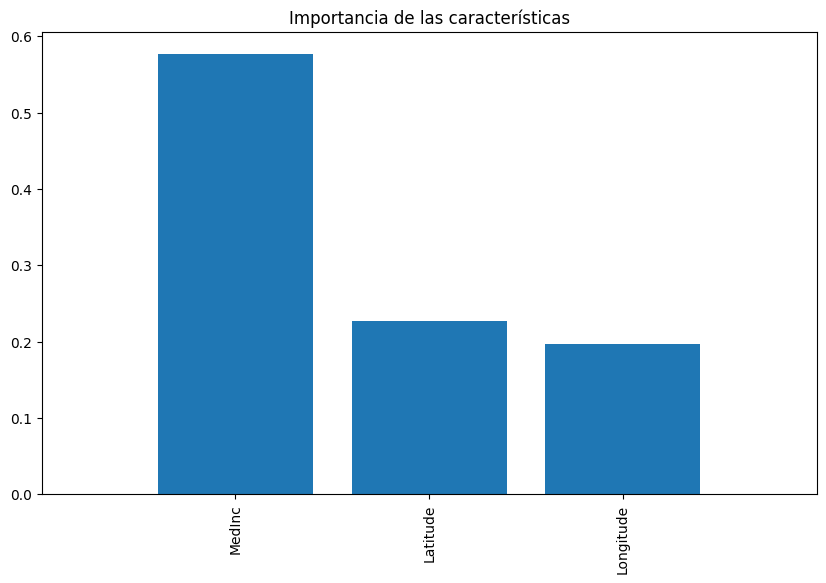

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la importancia de las características
importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.title("Importancia de las características")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [17]:
y_pred = model_rf.predict(X_test)
y_pred

array([3, 3, 5, ..., 4, 5, 1], dtype=int32)

In [18]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

Accuracy Score: 0.9963662790697675


La prediccion del modelo arroja un Accuracy Score: 0.99 es decir casi el 100%

### Paso 5: Guarda los modelos

In [20]:
import joblib

model_path_unsup = '/workspaces/Proyecto-K-Medias/models/model_kmeans_default_42.joblib'
model_path_sup = '/workspaces/Proyecto-K-Medias/models/decision_RandomForestClassifier_default_42.joblib'

# Save the model
joblib.dump(kmeans, model_path_unsup)
joblib.dump(model_rf, model_path_sup)

print(f"Modelo guardado en {model_path_unsup}")
print(f"Modelo guardado en {model_path_sup}")

Modelo guardado en /workspaces/Proyecto-K-Medias/models/model_kmeans_default_42.joblib
Modelo guardado en /workspaces/Proyecto-K-Medias/models/decision_RandomForestClassifier_default_42.joblib
